<a href="https://colab.research.google.com/github/OkeyNich/OkeyNich/blob/main/Copy_of_Okey_Simple_liniear_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')

In [4]:
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 
                'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
                'X6': 'Orientation', 'X7': 'Glazing_Area', 
                'X8': 'Glazing_Area_Distribution', 
                'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

In [5]:
df = df.rename(columns=column_names)

In [6]:
#select a sample of the dataset
simple_linear_reg_df = df[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

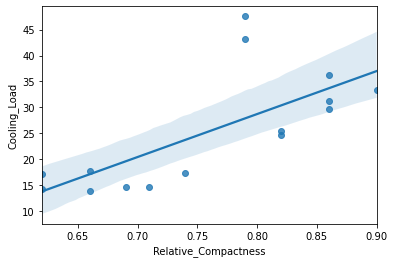

In [7]:
#regression plot
import seaborn as sns
sns.regplot(x="Relative_Compactness", y="Cooling_Load",data=simple_linear_reg_df)

The conculusion is that there is no relationship between the cooling_load and Relative_Compactness. There we can say there is no corolation beetwen the two.

In [8]:
simple_linear_reg_df.value_counts()

Relative_Compactness  Cooling_Load
0.90                  33.31           1
0.86                  36.21           1
                      31.28           1
                      29.69           1
0.82                  25.35           1
                      24.61           1
0.79                  47.59           1
                      43.14           1
0.74                  17.25           1
0.71                  14.67           1
0.69                  14.60           1
0.66                  17.79           1
                      13.83           1
0.62                  17.21           1
                      14.24           1
dtype: int64

### The data above further clarify the fact that there is no colrolation between Relative_Compactness and Cooling_Load.

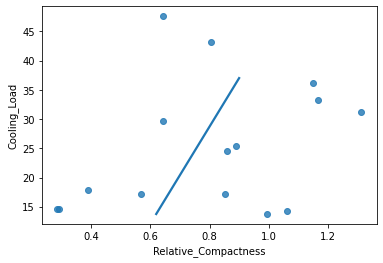

In [9]:

sns.regplot(x="Relative_Compactness", y="Cooling_Load",data=simple_linear_reg_df,ci=None,x_jitter=0.75)

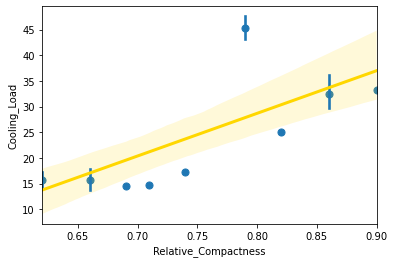

In [10]:
import numpy as np
sns.regplot(x="Relative_Compactness", y="Cooling_Load",data=simple_linear_reg_df,x_estimator=np.mean,line_kws={'lw':3,'color':'gold'})

In [11]:
#Firstly, we normalise our dataset to a common scale using the min max scaler

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']

In [15]:
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state=1)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [21]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.063

In [22]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3) 

1.823

In [23]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

0.089

In [24]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.893

In [25]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [35]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [44]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df


In [46]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')


In [47]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [49]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Surface_Area,-6.387091e+12,-0.062275,0.000000
1,Relative_Compactness,-6.064125e-01,-0.283471,-0.027719
2,Orientation,-2.822876e-03,0.003369,0.000000
3,Glazing_Area_Distribution,1.913548e-02,0.029088,0.021431
4,Glazing_Area,2.295933e-01,0.212449,0.206132
5,Overall_Height,3.852539e-01,0.442467,0.463482
6,Wall_Area,3.725803e+12,0.103061,0.200087
7,Roof_Area,4.790318e+12,-0.163192,-0.000000
